<a href="https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/05%20efficient%20frontier%20multi-period.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install okama

In [1]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12.0, 6.0]

import okama as ok

A single period approach is used in classic Markowitz Mean-Variance Analysis (MVA) where a portfolio is always rebalanced and has original weights. In `okama` it's equivalent to monthly rebalanced portfolios as monthly historical data is used.

However, in real life portfolios are not rebalanced every day or every moth. In **multi-period** approach portfolio is rebalanced to the original allocation with a certain frequency (annually, quarterly etc.) or not rebalanced at all.

**EfficientFrontierReb** class can be used for multi-period optimization. Actually two rebalancing frequencies can be usd (**rebalancing_period** parameter):
- 'year' - one Year (default)
- 'none' - not rebalanced portfolios

## 2 Assets

First example is a simple USD portfolio with 2 ETFs (S&P500 and physical gold spot prices).

In [2]:
ls = ["SPY.US", "GLD.US"]
curr = "USD"
y = ok.EfficientFrontierReb(
    assets=ls,
    first_date="2004-12",
    last_date="2020-10",
    ccy=curr,
    rebalancing_period="year",  # set rebalancing period to one year
    ticker_names=True,  # use tickers in DataFrame column names (can be set to False to show full assets names instead tickers)
    n_points=20,  # number of points in the Efficient Frontier
    verbose=True,
)  # verbose mode is ON to show progress while the EF points are calcualted

In [3]:
y

symbols                  [SPY.US, GLD.US]
currency                              USD
first_date                        2004-12
last_date                         2020-10
period_length         15 years, 11 months
rebalancing_period                   year
inflation                        USD.INFL
dtype: object

In [4]:
y.names

{'SPY.US': 'SPDR S&P 500 ETF Trust', 'GLD.US': 'SPDR Gold Shares'}

We need to get all the points of the optimized portfolios to plot the Efficient Frontier.  

As the algorithm uses "black box" objective function (there is no algebraic functions as in classic MVA) the optimization process is slower than in single period optimization.
Using "verbose mode" is recommended to see the progress.

In [5]:
df_reb_year = y.ef_points

left EF point #1/20 is done in 0.55 sec.
left EF point #2/20 is done in 0.88 sec.
left EF point #3/20 is done in 0.89 sec.
left EF point #4/20 is done in 1.09 sec.
left EF point #5/20 is done in 1.13 sec.
left EF point #6/20 is done in 1.14 sec.
left EF point #7/20 is done in 1.09 sec.
left EF point #8/20 is done in 1.41 sec.
left EF point #9/20 is done in 1.53 sec.
left EF point #10/20 is done in 1.39 sec.
left EF point #11/20 is done in 2.75 sec.
left EF point #12/20 is done in 3.48 sec.
left EF point #13/20 is done in 1.64 sec.
left EF point #14/20 is done in 1.80 sec.
left EF point #15/20 is done in 1.91 sec.
left EF point #16/20 is done in 1.71 sec.
left EF point #17/20 is done in 1.50 sec.
left EF point #18/20 is done in 1.39 sec.
left EF point #19/20 is done in 3.35 sec.
left EF point #20/20 is done in 2.90 sec.
right EF point #1/16 is done in 2.24 sec.
right EF point #2/16 is done in 2.14 sec.
right EF point #3/16 is done in 2.47 sec.
right EF point #4/16 is done in 2.40 sec.
r

**ef_points** property returns the dataframe (table).
Each row has risk and return properties of portfolio which could be used to plot the points of the frontier:
- _Risk_ - the volatility or annual standard deviation
- _CAGR_ - Compound annual growth rate  
... and assets weights

In [6]:
df_reb_year.head(5)

,Risk,CAGR,GLD.US,SPY.US
0,0.159400,0.087763,0.000000,1.000000
1,0.157205,0.088171,0.014261,0.985739
2,0.155007,0.088580,0.028941,0.971059
3,0.152810,0.088988,0.044079,0.955921
4,0.150615,0.089397,0.059713,0.940287


It's interesting to compare annualy rebalanced portfolios with not rebalanced portfolios.

In [7]:
y.rebalancing_period = "none"  # Set rebalancing period to NONE

In [8]:
df_not_reb = y.ef_points

left EF point #1/20 is done in 0.05 sec.
left EF point #2/20 is done in 0.08 sec.
left EF point #3/20 is done in 0.06 sec.
left EF point #4/20 is done in 0.07 sec.
left EF point #5/20 is done in 0.11 sec.
left EF point #6/20 is done in 0.10 sec.
left EF point #7/20 is done in 0.12 sec.
left EF point #8/20 is done in 0.19 sec.
left EF point #9/20 is done in 0.10 sec.
left EF point #10/20 is done in 0.07 sec.
left EF point #11/20 is done in 0.05 sec.
left EF point #12/20 is done in 0.09 sec.
left EF point #13/20 is done in 0.09 sec.
left EF point #14/20 is done in 0.09 sec.
left EF point #15/20 is done in 0.08 sec.
left EF point #16/20 is done in 0.08 sec.
left EF point #17/20 is done in 0.09 sec.
left EF point #18/20 is done in 0.07 sec.
left EF point #19/20 is done in 0.08 sec.
left EF point #20/20 is done in 0.07 sec.
Total time taken is 0.03 min.


Finally we can plot both Efficient Frontiers...

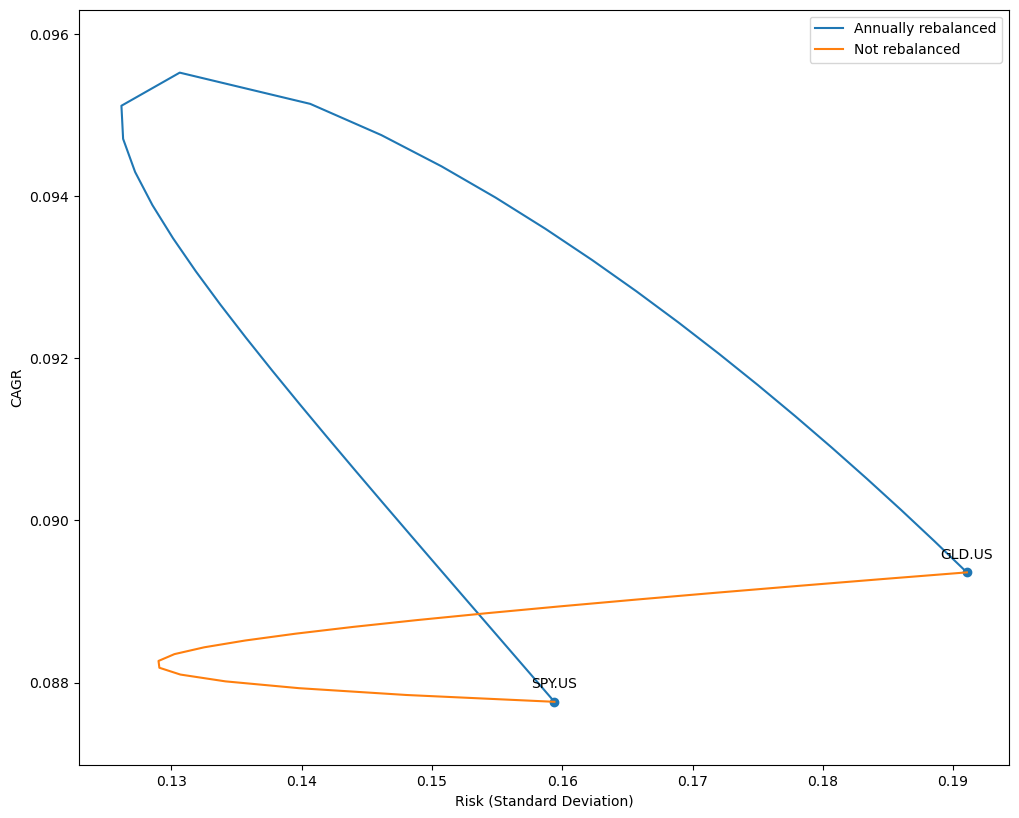

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the Efficient Fronrier
ax.plot(df_reb_year.Risk, df_reb_year.CAGR, label="Annually rebalanced")
ax.plot(df_not_reb.Risk, df_not_reb.CAGR, label="Not rebalanced")

# Plot the aseets
y.plot_assets(kind="cagr")

# Set axis labels
ax.set_xlabel("Risk (Standard Deviation)")
ax.set_ylabel("CAGR")
ax.legend();

As one can see rebalanced portfolios have more options with higher CAGR. The difference is up to 0,5%.

### Multiple assets

Second example will have an asset list composed by US ETFs and Russian indexes for bonds (RGBITR.INDX) and stocks (MCFTR.INDX).  
The currency of portfolios is Russian Ruble (RUB).

In [10]:
ls_m = ["SPY.US", "GLD.US", "PGJ.US", "RGBITR.INDX", "MCFTR.INDX"]
curr_rub = "RUB"

In [11]:
x = ok.EfficientFrontierReb(
    assets=ls_m,
    first_date="2005-01",
    last_date="2020-11",
    ccy=curr_rub,
    rebalancing_period="year",  # set rebalancing period to one year
    n_points=20,
    verbose=True,
)

In [12]:
x

symbols               [SPY.US, GLD.US, PGJ.US, RGBITR.INDX, MCFTR.INDX]
currency                                                            RUB
first_date                                                      2005-01
last_date                                                       2020-11
period_length                                       15 years, 11 months
rebalancing_period                                                 year
inflation                                                      RUB.INFL
dtype: object

In [13]:
x.names

{'SPY.US': 'SPDR S&P 500 ETF Trust',
 'GLD.US': 'SPDR Gold Shares',
 'PGJ.US': 'Invesco Golden Dragon China ETF',
 'RGBITR.INDX': 'Russian Government Bond Index',
 'MCFTR.INDX': 'MOEX Total Return'}

As in the first example we will draw 2 Efficient Frontier: not rebalanced portfolios with annually rebalanced portfolios..

In [14]:
df1_reb_year = x.ef_points

left EF point #1/20 is done in 0.75 sec.
left EF point #2/20 is done in 3.07 sec.
left EF point #3/20 is done in 1.88 sec.
left EF point #4/20 is done in 1.82 sec.
left EF point #5/20 is done in 1.82 sec.
left EF point #6/20 is done in 2.18 sec.
left EF point #7/20 is done in 2.31 sec.
left EF point #8/20 is done in 2.83 sec.
left EF point #9/20 is done in 3.52 sec.
left EF point #10/20 is done in 5.09 sec.
left EF point #11/20 is done in 7.02 sec.
left EF point #12/20 is done in 7.79 sec.
left EF point #13/20 is done in 2.67 sec.
left EF point #14/20 is done in 2.64 sec.
left EF point #15/20 is done in 2.59 sec.
left EF point #16/20 is done in 2.53 sec.
left EF point #17/20 is done in 2.81 sec.
left EF point #18/20 is done in 5.89 sec.
left EF point #19/20 is done in 3.32 sec.
left EF point #20/20 is done in 8.14 sec.
right EF point #1/4 is done in 9.67 sec.
right EF point #2/4 is done in 10.71 sec.
right EF point #3/4 is done in 6.95 sec.
right EF point #4/4 is done in 6.14 sec.
Tota

In [15]:
x.rebalancing_period = "none"

In [16]:
df1_not_reb = x.ef_points

left EF point #1/20 is done in 0.09 sec.
left EF point #2/20 is done in 0.21 sec.
left EF point #3/20 is done in 0.86 sec.
left EF point #4/20 is done in 1.36 sec.
left EF point #5/20 is done in 0.33 sec.
left EF point #6/20 is done in 0.26 sec.
left EF point #7/20 is done in 0.36 sec.
left EF point #8/20 is done in 0.29 sec.
left EF point #9/20 is done in 0.32 sec.
left EF point #10/20 is done in 0.52 sec.
left EF point #11/20 is done in 0.96 sec.
left EF point #12/20 is done in 0.34 sec.
left EF point #13/20 is done in 0.80 sec.
left EF point #14/20 is done in 1.08 sec.
left EF point #15/20 is done in 0.69 sec.
left EF point #16/20 is done in 0.78 sec.
left EF point #17/20 is done in 1.26 sec.
left EF point #18/20 is done in 1.34 sec.
left EF point #19/20 is done in 0.32 sec.
left EF point #20/20 is done in 0.16 sec.
Total time taken is 0.21 min.


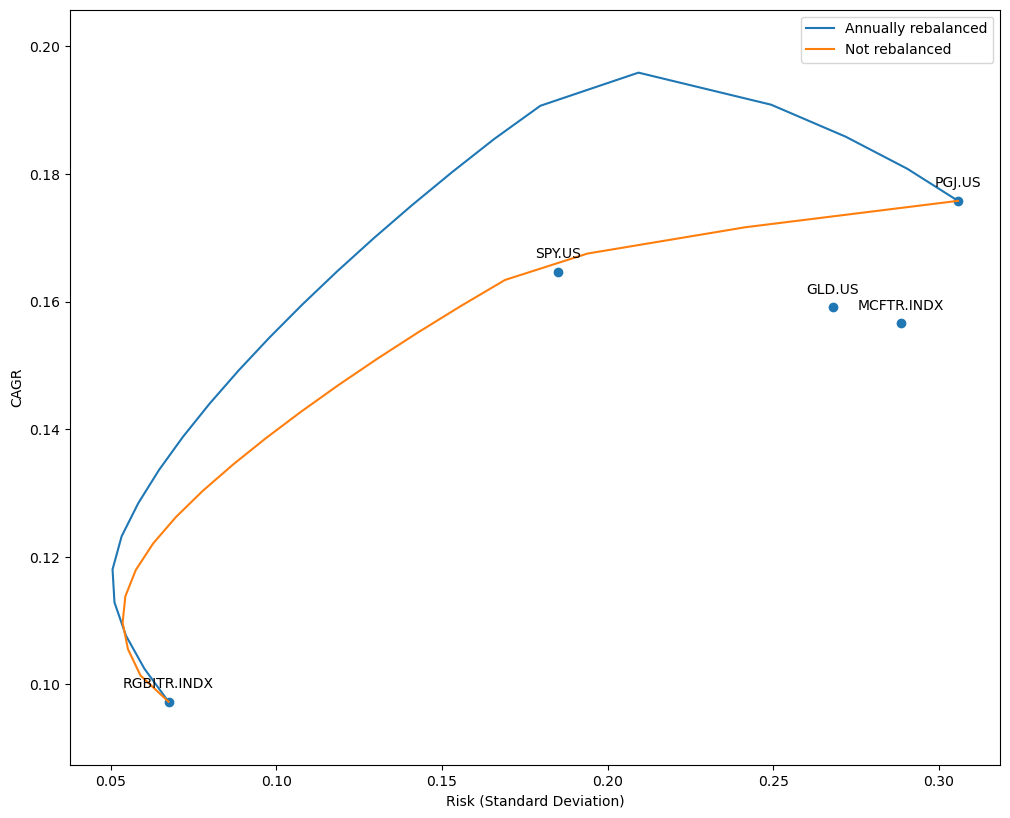

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the Efficient Frontiers
ax.plot(df1_reb_year.Risk, df1_reb_year.CAGR, label="Annually rebalanced")
ax.plot(df1_not_reb.Risk, df1_not_reb.CAGR, label="Not rebalanced")

# Plot the assets
x.plot_assets(kind="cagr")

# Set labels
ax.set_xlabel("Risk (Standard Deviation)")
ax.set_ylabel("CAGR")
ax.legend();

### Compare with monthly rebalanced portfolios

We can also add monthly rebalanced portfolio Frontier (single period optimization) to the chart.

Single period optimization can be achieved with **EfficientFrontier** class.

In [18]:
z = ok.EfficientFrontier(
    assets=ls_m,
    first_date="2005-01",
    last_date="2020-11",
    ccy=curr_rub,
    n_points=20,
)

In [19]:
df2 = z.ef_points  # Create EF points

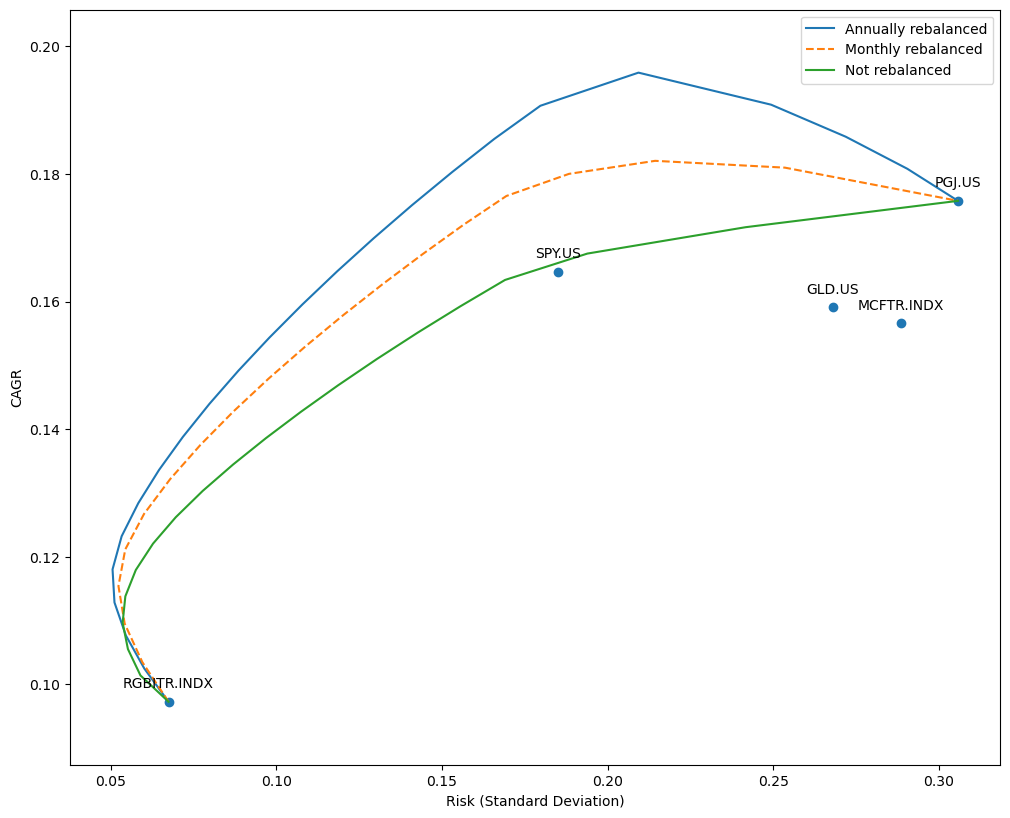

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))

# Plot Efficient Frontiers
ax.plot(df1_reb_year.Risk, df1_reb_year.CAGR, label="Annually rebalanced")
ax.plot(df2.Risk, df2.CAGR, linestyle="--", label="Monthly rebalanced")
ax.plot(df1_not_reb.Risk, df1_not_reb.CAGR, label="Not rebalanced")

# Plot the assets
z.plot_assets(kind="cagr")

# Set axis labels
ax.set_xlabel("Risk (Standard Deviation)")
ax.set_ylabel("CAGR")
ax.legend();

### Monte Carlo simulation for multi-period optimization

As in the EfficientFrontier there is a **get_monte_carlo** method which allows to generate N random multi-period portfolios for selected rebalancing frequency.

In [21]:
x.rebalancing_period = (
    "year"  # me must set the rebalancing frequency first (annually rebalanced portfolios in this case)
)

In [22]:
monte_carlo = x.get_monte_carlo(n=1000)  # generate n random portfolios

In [23]:
monte_carlo.head(5)  # table of random portfolios properties

,CAGR,Risk
0,0.181925,0.172937
1,0.167150,0.128937
2,0.174437,0.141705
3,0.159997,0.122588
4,0.190236,0.206230


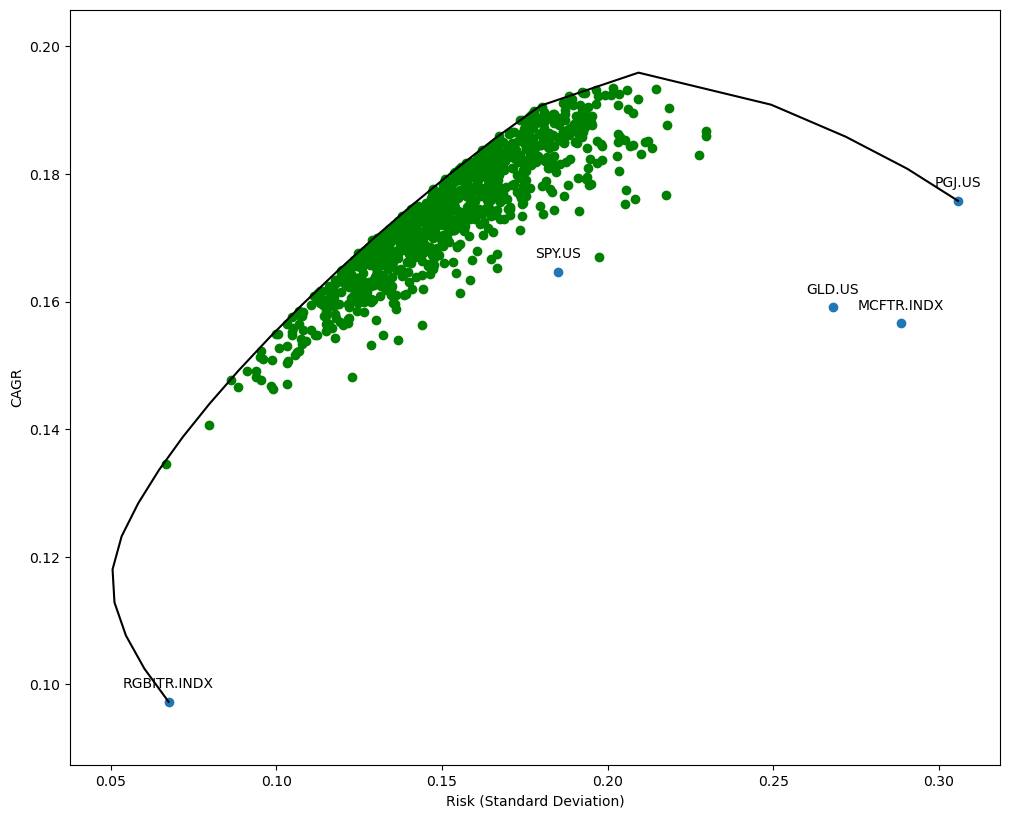

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))

# Plot Monte Carlo simulation and the Eficient Frontier
ax.plot(df1_reb_year.Risk, df1_reb_year.CAGR, color="black")
ax.scatter(monte_carlo.Risk, monte_carlo.CAGR, color="green")  # draw the random portfolios risk-return points

# Plot the assets
x.plot_assets(kind="cagr")

ax.set_xlabel("Risk (Standard Deviation)")
ax.set_ylabel("CAGR");

To cover more space inside the Efficient Frontier with Monte Carlos simulation bigger number on random portfolios is required. But it will take more time to generate it.